In [134]:
import cirq 
import numpy as np 
import random 

In [195]:
    def special(u):
        return u / (np.linalg.det(u) ** (1 / 4))


    def random_unitary(n_qubits = 3):
        return cirq.testing.random_unitary(2 ** n_qubits)

    def random_diagonal(n_qubits = 3):
        return np.diag(random_unitary(n_qubits).diagonal())

    def diagonalize(u):        
        eigvals, V = np.linalg.eig(u)

        d = np.diag(np.sqrt(eigvals))
    #     np.testing.assert_almost_equal(V @ d @ d @ V.conj().T, u)
        return d,V


    np.set_printoptions(suppress=True, precision=2)

In [136]:
for i in range(1000): 
    diagonalize(random_unitary(2))

In [137]:
for i in range(1000): 
    diagonalize(random_diagonal(2))

In [138]:
d = np.array([[ 9.99933043e-01-1.15719559e-02j,  2.27189354e-16-1.76583529e-17j, -5.55111512e-17+2.08166817e-16j,  5.55111512e-17+1.66533454e-16j],
       [-2.27537164e-16-1.23959254e-17j,  9.99933043e-01-1.15719559e-02j,  2.60998809e-18-3.75420002e-17j, -4.64138777e-17+4.72722989e-17j],
       [-1.38777878e-17+1.87350135e-16j, -3.47809964e-18-3.74715444e-17j,  9.99933043e-01-1.15719559e-02j, -2.22044605e-16-5.55111512e-17j],
       [-8.32667268e-17+1.38777878e-16j,  4.74954398e-17+4.61855116e-17j,  1.66533454e-16-1.11022302e-16j,  9.99933043e-01-1.15719559e-02j]])

In [139]:
# np.set_printoptions(suppress=False, precision=8)
D,V = np.linalg.eigh(d)

np.linalg.norm(V @ np.diag(D) @ V.conj().T - d)

0.023143911799999993

In [140]:
a,v,b = np.linalg.svd(d)
a @ np.diag(v) @ b - d

array([[-0.+0.j, -0.-0.j,  0.-0.j,  0.-0.j],
       [ 0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j],
       [ 0.+0.j,  0.-0.j,  0.+0.j,  0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.-0.j,  0.+0.j]])

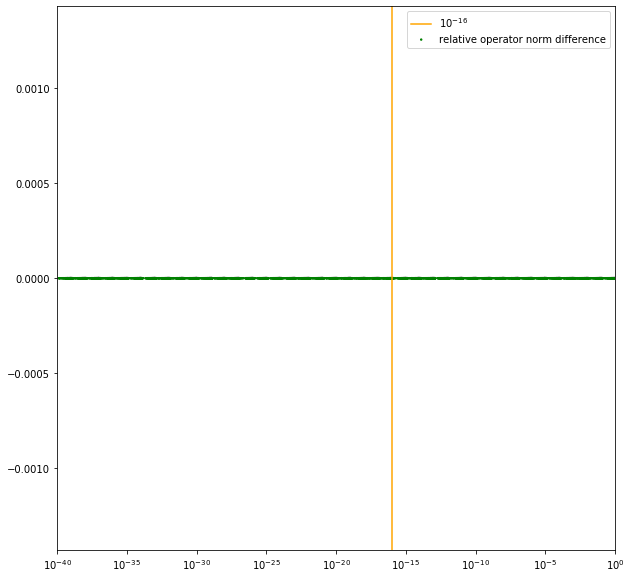

In [141]:
from matplotlib import pyplot as plt 
import numpy as np

xs = []
ys = []
md = []
norms = []
num_random = 200
colors = []

for prec in range(40): 
    for i in range(num_random): 
        err = lambda : (random.random()*2-1 + (random.random()*2-1) * 1j) * 10**(-prec)
        r = err()
        a,b,c=err(),err(),err()
        dd = np.eye(4) + np.diag([r,r,r,r]) 
        
        dr = random_unitary(2)
        
        d = dr + dd 
#         d /= np.linalg.norm(d)        
        xs.append(np.abs(r))
        diag, V = diagonalize(d)
        new_d = V @ diag @ diag @ V.conj().T

        n = np.linalg.norm(new_d - d)
        nperc = np.linalg.norm(new_d - d) / np.linalg.norm(d)
        norms.append(n)
        ys.append(nperc)
        col = 'green' if np.allclose(new_d, d, atol=1, rtol=0) else 'red'
        colors.append(col)
#         print(diff)
#         md.append(diff2)

plt.figure(figsize=[10,10])
ax = plt.gca()
ax.set_xscale('log')
plt.xlim((1e-40,1))
# plt.axes(xlabel="precision", ylabel="% error")
plt.scatter(xs,ys,label="relative operator norm difference",s=2, color=colors)
# plt.scatter(xs,norms,label="norm difference", s=2)
plt.axvline(x=1e-16, color='orange', label='$10^{-16}$')
plt.legend()

## This is interesting - what are meaningful limits for operator difference? Is this a lot or not? 
## 

/Users/balintp/envs/cirq37/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


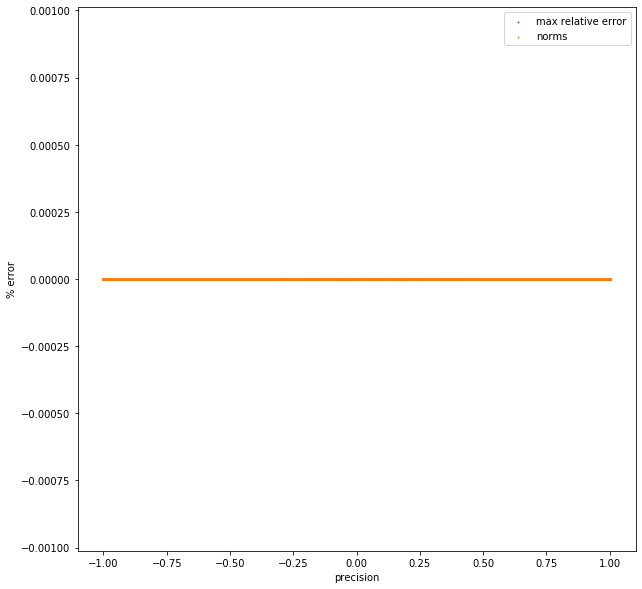

In [142]:
from matplotlib import pyplot as plt 
import numpy as np

xs = []
ys = []
md = []
norms = []
num_random = 200

for prec in range(40): 
    for i in range(num_random): 
        err = lambda : (random.random()*2-1 + (random.random()*2-1) * 1j) * 10**(-prec)
        r = err()
        r /= np.abs(r)  
        dd = np.eye(4) - np.diag([r,r,r,r]) 
        
        dr = ((np.random.random((4,4)) * 2 - 1) * 1j + (np.random.random((4,4)) * 2 - 1)) * 10**(-prec)
        
        d = dr - dr.diagonal() + dd 
                
        xs.append(r)
        a,vals,b = np.linalg.svd(d)
        new_d = a @ np.diag(vals) @ b
    #     diff = np.abs(sum(sum(V @ diag @ diag @ V.conj().T - d))) / np.abs(np.max(d)) * 100 
#         diff2 = (np.abs(np.max(V @ diag @ diag @ V.conj().T)) / np.abs(np.max(d)) - 1) * 100 
#         diff = np.max(np.abs((V @ diag @ diag @ V.conj().T) / d - 1)) * 100 
        n = np.linalg.norm(new_d - d)
        nperc = np.linalg.norm(new_d - d) / np.linalg.norm(d) * 100
        norms.append(n)
        ys.append(nperc)
#         print(diff)
#         md.append(diff2)

plt.figure(figsize=[10,10])
plt.axes(xlabel="precision", ylabel="% error")
plt.scatter(xs,ys,label="max relative error", s=1)
plt.scatter(xs,norms,label="norms", s=1)
plt.legend()

In [143]:
np.set_printoptions(suppress=False, precision=8)
diagonalize(np.array([[ 1.-0.01j,  0.-0.j  , -0.+0.j  ,  0.+0.j  ],
       [-0.-0.j  ,  1.-0.01j,  0.-0.j  , -0.+0.j  ],
       [-0.+0.j  , -0.-0.j  ,  1.-0.01j, -0.-0.j  ],
       [-0.+0.j  ,  0.+0.j  ,  0.-0.j  ,  1.-0.01j]]))

(array([[1.0000125-0.00499994j, 0.       +0.j        , 0.       +0.j        , 0.       +0.j        ],
        [0.       +0.j        , 1.0000125-0.00499994j, 0.       +0.j        , 0.       +0.j        ],
        [0.       +0.j        , 0.       +0.j        , 1.0000125-0.00499994j, 0.       +0.j        ],
        [0.       +0.j        , 0.       +0.j        , 0.       +0.j        , 1.0000125-0.00499994j]]),
 array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]]))

In [144]:
np.array([1,1]) / np.array([2,3])

array([0.5       , 0.33333333])

In [145]:
np.eye(2).diagonal()

array([1., 1.])

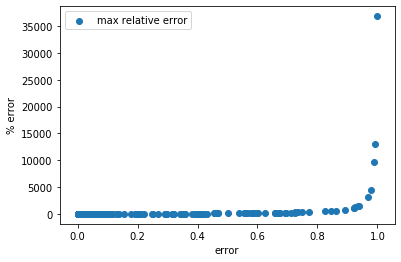

In [146]:
from matplotlib import pyplot as plt 

xs = []
ys = []
md = []
num_random = 100 

for prec in range(100): 
    for i in range(num_random): 
        r = random.random() * 10**(-prec)
        diff = (1 / (1-r) - 1) * 100 
        xs.append(r)
        ys.append(diff)
#         md.append(diff2)

plt.axes(xlabel="error", ylabel="% error")
plt.scatter(xs,ys,label="max relative error")
# plt.scatter(xs,md,label="md")
plt.legend()

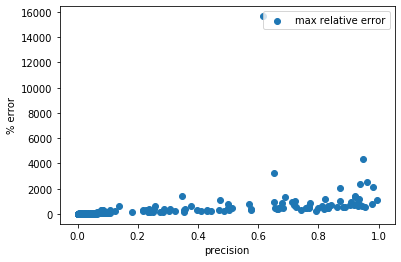

In [147]:
from matplotlib import pyplot as plt 

xs = []
ys = []
md = []
num_random = 100 

for prec in range(40): 
    for i in range(num_random): 
        d = random_unitary(2)
        r = random.random() * 10**(-prec)
        xs.append(r)
        diag, V = diagonalize(d - r)
    #     diff = np.abs(sum(sum(V @ diag @ diag @ V.conj().T - d))) / np.abs(np.max(d)) * 100 
        diff2 = (np.abs(np.max(V @ diag @ diag @ V.conj().T)) / np.abs(np.max(d)) - 1) * 100 
        diff = np.max(np.abs((V @ diag @ diag @ V.conj().T) / d - 1)) * 100 
        ys.append(diff)
#         print(diff)
#         md.append(diff2)

plt.axes(xlabel="precision", ylabel="% error")
plt.scatter(xs,ys,label="max relative error")
# plt.scatter(xs,md,label="md")
plt.legend()

In [148]:
u = random_unitary(2)

In [149]:
u

array([[-0.17526667-0.19212263j, -0.50424828+0.23901808j,  0.64560371+0.28610892j, -0.24953152+0.245043j  ],
       [-0.06643123+0.25814446j, -0.49888303-0.39834663j, -0.27836522-0.31076347j, -0.0237759 +0.58886126j],
       [ 0.28852348-0.40675692j,  0.10234079-0.45295426j,  0.38908414-0.04737715j,  0.59308124+0.17402697j],
       [-0.32702901-0.71110748j,  0.18382873+0.17777938j, -0.41346505+0.05188445j, -0.06075825+0.38031928j]])

In [150]:
np.sqrt(u)

array([[0.20590055-0.46654229j, 0.16398227+0.72879247j, 0.82212045+0.17400669j, 0.22383016+0.54738603j],
       [0.31632575+0.4080358j , 0.26412555-0.75408576j, 0.26347782-0.58973365j, 0.53177305+0.55367723j],
       [0.62738296-0.32416956j, 0.53231223-0.42545919j, 0.62491684-0.03790676j, 0.77819265+0.11181484j],
       [0.47732202-0.74489282j, 0.46880703+0.18960827j, 0.04026595+0.64427199j, 0.40273049+0.47217592j]])

In [151]:
np.linalg.svd(np.sqrt(u))

(array([[-0.47780415+0.20354461j,  0.16961995+0.29834411j,  0.75813567+0.13942143j, -0.13238194-0.02756161j],
        [ 0.00122517+0.38384216j, -0.34360837-0.64313389j,  0.10738184+0.22576142j, -0.38112879-0.33647815j],
        [-0.18891061+0.55753666j, -0.33146965+0.01620444j, -0.11035041+0.17518257j,  0.64119037+0.29889748j],
        [-0.43969401+0.20753627j, -0.24525866+0.42455322j, -0.44404432-0.32132755j, -0.24933612-0.40075601j]]),
 array([2.17045088, 1.46415584, 0.76521091, 0.39840235]),
 array([[-0.32253991+0.j        , -0.33342635-0.40589635j, -0.27948986-0.45392779j,  0.02483085-0.57901765j],
        [-0.76624666+0.j        ,  0.28798035+0.26673202j,  0.36608355-0.01116047j, -0.3360158 -0.10834696j],
        [ 0.15488876+0.j        , -0.41599309+0.534755j  ,  0.31650109-0.63243819j,  0.04086914+0.1231869j ],
        [ 0.53370734+0.j        ,  0.3326792 -0.01754294j,  0.26482903-0.10680748j, -0.4792743 -0.54122746j]]))

In [152]:
np.linalg.eig(u)

(array([ 0.9207028 -0.39026446j, -0.41941056-0.90779666j, -0.99864287+0.05208085j,  0.15152681+0.98845315j]),
 array([[ 0.45519165+0.37426785j, -0.34247651-0.18759442j,  0.66383431+0.j        , -0.22372983+0.09752578j],
        [-0.07998532-0.042872j  ,  0.76639769+0.j        ,  0.5171415 -0.10953502j,  0.23995652+0.25958917j],
        [ 0.70953016+0.j        ,  0.38648077+0.06516147j, -0.17824294+0.14868228j,  0.03458157-0.53654515j],
        [ 0.09803149-0.3625538j , -0.3040985 -0.11858941j,  0.19131002+0.4352175j ,  0.72552838+0.j        ]]))

In [153]:
np.linalg.norm(d-d)

0.0

In [154]:
def blockplus(u1,u2): 
    N = len(u1)
    z = np.zeros((N,N))
    return np.hstack([np.vstack([u1,z]), 
                    np.vstack([z,u2])])



In [155]:
u1,u2 = random_unitary(2), random_unitary(2)
u1u2 = blockplus(u1,u2)
d1 = random_diagonal(2)
d2 = random_diagonal(2)

D = blockplus(d1,d2)

u1u2Dag = u1 @ u2.conj().T
u2Dagu1 = u2.conj().T @ u1

print(np.linalg.eig(u1u2Dag))
print(np.linalg.eig(u2Dagu1))

(array([-0.90229322+0.43112288j,  0.10610265+0.99435518j,  0.99097605+0.13403909j,  0.5685255 -0.82266564j]), array([[ 0.57934213+0.j        , -0.32765599-0.17340133j,  0.71597676+0.j        ,  0.09973624+0.06607722j],
       [ 0.14775631+0.10728322j, -0.29735391+0.19127165j, -0.32686738+0.15061958j,  0.84387538+0.j        ],
       [ 0.51065617-0.25810993j,  0.28121669+0.50260496j, -0.17601402+0.29274154j, -0.19185399+0.43293009j],
       [ 0.31293079+0.45354706j,  0.63708301+0.j        ,  0.01719439-0.49078972j,  0.20629404-0.0822629j ]]))
(array([-0.90229322+0.43112288j,  0.10610265+0.99435518j,  0.99097605+0.13403909j,  0.5685255 -0.82266564j]), array([[-0.48378657-0.29616592j, -0.00330171+0.55498312j,  0.39394346+0.37923024j,  0.02981076-0.26518565j],
       [ 0.12761472+0.19206496j,  0.40519543+0.18896651j, -0.08098452+0.0564138j ,  0.85859935+0.j        ],
       [ 0.71157342+0.j        , -0.08950979+0.19604528j,  0.66112241+0.j        , -0.0443089 +0.09039576j],
       [ 0.2074

In [156]:
print(np.linalg.svd(u1u2Dag))
print(np.linalg.svd(u2Dagu1))

(array([[ 0.27170163+0.68943332j,  0.2224123 +0.25439491j, -0.40462761+0.08116557j, -0.22787248-0.33828788j],
       [ 0.60448344+0.19067149j, -0.37024719+0.14869395j,  0.40331469-0.47364885j,  0.22802202-0.00716051j],
       [ 0.11341863-0.15182363j, -0.65611748+0.16649567j, -0.19877035+0.58393313j,  0.20787381-0.28666316j],
       [ 0.03190128+0.11032761j,  0.10610654+0.50710312j, -0.19041933+0.16104534j,  0.35891384+0.72621188j]]), array([1., 1., 1., 1.]), array([[-0.        +0.j        ,  0.12324556-0.04535269j, -0.87834102+0.43637349j,  0.11936788-0.08124168j],
       [ 0.        +0.j        , -0.71769809-0.17942452j,  0.        +0.j        ,  0.67284196+0.j        ],
       [-0.        +0.j        ,  0.61871797-0.2294734j ,  0.17457431-0.08728716j,  0.59877292-0.40976308j],
       [-1.        +0.j        , -0.        +0.j        , -0.        +0.j        , -0.        +0.j        ]]))
(array([[-0.07915094-0.42649303j,  0.77310328+0.03133638j,  0.03542533+0.00987131j,  0.44667267-0.

In [157]:
a,d,b = np.linalg.svd(u1u2Dag)

In [184]:
A = np.array([[1,1000],[0,1]])
E = np.array([[0,0],[1e-15,0]])

np.linalg.eig(A)

(array([1., 1.]), array([[ 1.00000000e+00, -1.00000000e+00],
        [ 0.00000000e+00,  2.22044605e-19]]))

In [172]:
np.linalg.eig(A+E)

(array([1.000001, 0.999999]), array([[ 1.e+00, -1.e+00],
        [ 1.e-09,  1.e-09]]))

In [173]:
np.linalg.eig(A-E)

(array([1.+1.e-06j, 1.-1.e-06j]), array([[1.+0.e+00j, 1.-0.e+00j],
        [0.+1.e-09j, 0.-1.e-09j]]))

In [185]:
d, V = np.linalg.eig(A)
V @ np.diag(d) @ np.linalg.inv(V)

array([[1., 0.],
       [0., 1.]])

In [186]:
V 

array([[ 1.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  2.22044605e-19]])

In [187]:
np.linalg.inv(V)

array([[1.00000000e+00, 4.50359963e+18],
       [0.00000000e+00, 4.50359963e+18]])

In [188]:
V @ np.linalg.inv(V)

array([[1., 0.],
       [0., 1.]])

In [192]:
np.round(V, decimals=10)

array([[ 1., -1.],
       [ 0.,  0.]])

In [193]:
d

array([1., 1.])

In [ ]:
# Hmmm...I think we're onto something! the problem is when eig vals are degenerate 
# then the eig vec mx becomes singular

In [200]:
def g(u):
    yy = np.kron(cirq.Y._unitary_(), cirq.Y._unitary_())
    return u @ yy @ u.T @ yy

def extract_right_diag(a, b, U):
    u = special(U)
    t = g(u.T).T.diagonal()
    psi = np.arctan(np.imag(np.sum(t)) / np.real(t[0] + t[3] - t[1] - t[2]))
    if np.real(t[0] + t[3] - t[1] - t[2]) == 0:
        print("t:", t, "psi:", psi)
    c_d = cirq.Circuit([cirq.CNOT(a, b), cirq.rz(psi)(b), cirq.CNOT(a, b)])
    return c_d._unitary_()

In [211]:
a,b = cirq.LineQubit.range(2)
U = random_unitary(n_qubits=2)
dU = extract_right_diag(a,b, U)
U @ dU, U, dU

(array([[-0.11+0.08j,  0.49+0.21j,  0.59-0.09j, -0.58-0.07j],
        [ 0.43+0.56j,  0.06+0.57j, -0.28-0.31j,  0.01-0.05j],
        [ 0.28+0.39j, -0.33-0.28j, -0.06+0.51j, -0.53+0.21j],
        [ 0.46+0.22j, -0.02-0.45j,  0.45-0.11j,  0.3 -0.48j]]),
 array([[-0.12+0.06j,  0.52+0.1j ,  0.55-0.21j, -0.56-0.19j],
        [ 0.31+0.64j,  0.18+0.54j, -0.34-0.24j,  0.03-0.05j],
        [ 0.19+0.44j, -0.38-0.2j ,  0.05+0.51j, -0.56+0.09j],
        [ 0.4 +0.31j, -0.11-0.44j,  0.42-0.2j ,  0.39-0.41j]]),
 array([[0.98-0.21j, 0.  +0.j  , 0.  +0.j  , 0.  +0.j  ],
        [0.  +0.j  , 0.98+0.21j, 0.  +0.j  , 0.  +0.j  ],
        [0.  +0.j  , 0.  +0.j  , 0.98+0.21j, 0.  +0.j  ],
        [0.  +0.j  , 0.  +0.j  , 0.  +0.j  , 0.98-0.21j]]))